<a href="https://colab.research.google.com/github/yuval728/Torch-learning/blob/master/01_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.0+cu121'

In [3]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
torch.cuda.device_count()

1

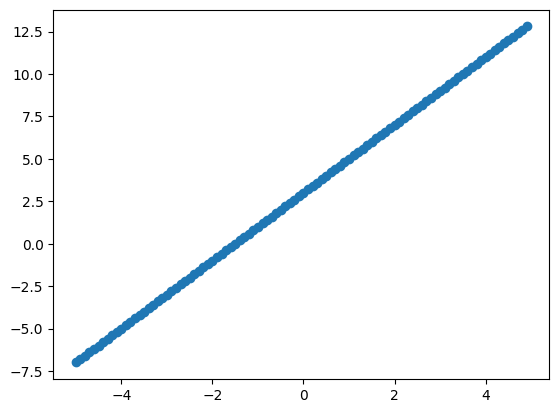

In [5]:
x=torch.arange(-5,5,0.1).view(-1,1)
y=2*x+3
plt.scatter(x.numpy(),y.numpy())
plt.show()

In [6]:
train_split=int(0.8*x.shape[0])
train_split

x_train=x[:train_split]
y_train=y[:train_split]
x_test=x[train_split:]
y_test=y[train_split:]

In [7]:
def plot_prediction(train_data=x_train,
                    train_labels=y_train,
                    test_data=x_test,
                    test_labels=y_test,
                    pred=None):

   
    plt.figure(figsize=(10,6))
    plt.scatter(train_data.numpy(),train_labels.numpy(),label='Train data',c='b')
                    
    plt.scatter(test_data.numpy(),test_labels.numpy(),label='Test data',c='g')
    
    if pred is not None:
        plt.scatter(test_data.numpy(),pred.detach().numpy(),label='Predictions',c='r')
    plt.legend()
    plt.show()
    


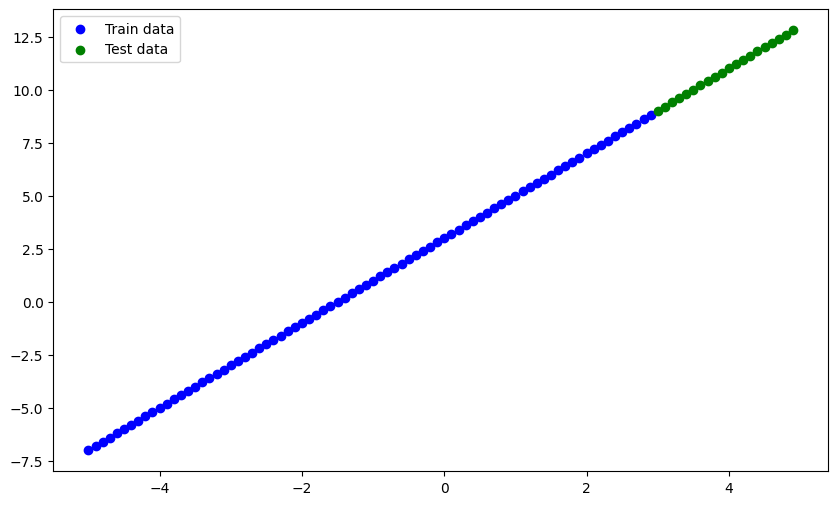

In [8]:
plot_prediction()

In [9]:
class LinearRegressionModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.weights=nn.Parameter(torch.rand(1,requires_grad=True, dtype=torch.float,device='cpu'))
        self.bias=nn.Parameter(torch.rand(1,
                                        dtype=torch.float, device='cpu'))
        
        
    def forward(self, x:torch.Tensor) -> torch.Tensor :
        return self.weights*x +self.bias
       
    

In [10]:
torch.manual_seed(42)
lrmodel = LinearRegressionModel()

In [11]:
list(lrmodel.parameters()), lrmodel.state_dict()

([Parameter containing:
  tensor([0.8823], requires_grad=True),
  Parameter containing:
  tensor([0.9150], requires_grad=True)],
 OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))]))

In [12]:
y_preds=lrmodel(x_test)
y_preds

tensor([[3.5618],
        [3.6500],
        [3.7383],
        [3.8265],
        [3.9147],
        [4.0029],
        [4.0912],
        [4.1794],
        [4.2676],
        [4.3559],
        [4.4441],
        [4.5323],
        [4.6205],
        [4.7088],
        [4.7970],
        [4.8852],
        [4.9734],
        [5.0617],
        [5.1499],
        [5.2381]], grad_fn=<AddBackward0>)

In [13]:
#to predict from model and removes grad_fn and makes faster prediction **Best practice
#can also use torch.no_grad() but inference_mode is better
with torch.inference_mode():
    y_preds=lrmodel(x_test)

y_preds, y_test

(tensor([[3.5618],
         [3.6500],
         [3.7383],
         [3.8265],
         [3.9147],
         [4.0029],
         [4.0912],
         [4.1794],
         [4.2676],
         [4.3559],
         [4.4441],
         [4.5323],
         [4.6205],
         [4.7088],
         [4.7970],
         [4.8852],
         [4.9734],
         [5.0617],
         [5.1499],
         [5.2381]]),
 tensor([[ 9.0000],
         [ 9.2000],
         [ 9.4000],
         [ 9.6000],
         [ 9.8000],
         [10.0000],
         [10.2000],
         [10.4000],
         [10.6000],
         [10.8000],
         [11.0000],
         [11.2000],
         [11.4000],
         [11.6000],
         [11.8000],
         [12.0000],
         [12.2000],
         [12.4000],
         [12.6000],
         [12.8000]]))

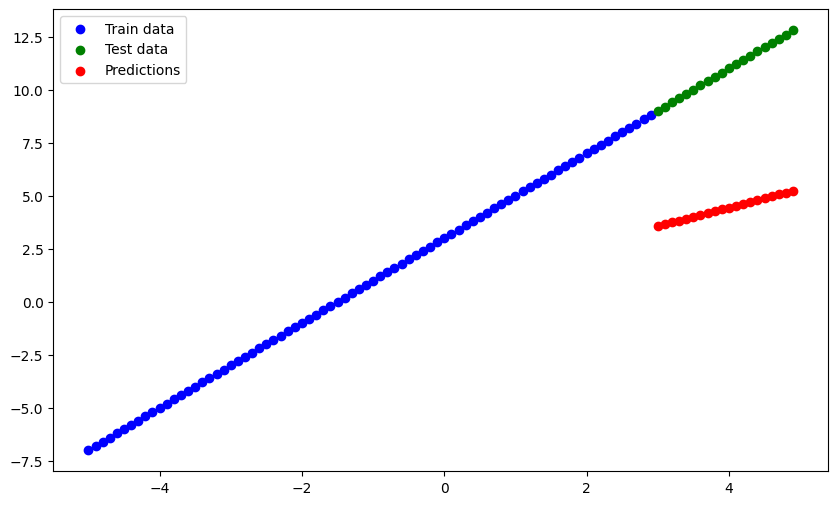

In [14]:
plot_prediction(pred=y_preds)

In [15]:
loss_fn=nn.L1Loss()
loss_fn

L1Loss()

In [16]:
optimizer=torch.optim.Adam(params=lrmodel.parameters(), lr=0.1)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    weight_decay: 0
)

In [17]:
lrmodel.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [18]:
EPOCHS=1

for epoch in range(EPOCHS):
    lrmodel.train() #train mode 
    
    y_preds=lrmodel(x_train)
    loss=loss_fn(y_preds,y_train)
    print(loss)
    
    optimizer.zero_grad() #It is used to not accumulate the gradients and start fresh for each iteration
    
    loss.backward()
    
    optimizer.step()
    

    lrmodel.eval()  #turns off different settings in the model not needed for testing such as dropout, batch normalization
    with torch.inference_mode(): #turns off gradient tracking and couple more things
        test_pred=lrmodel(x_test)
        test_loss=loss_fn(test_pred,y_test)
        print(test_loss)
        
    
    # print(lrmodel.state_dict())

tensor(2.3283, grad_fn=<MeanBackward0>)
tensor(6.0050)


In [19]:
lrmodel.state_dict()

OrderedDict([('weights', tensor([0.9823])), ('bias', tensor([1.0150]))])

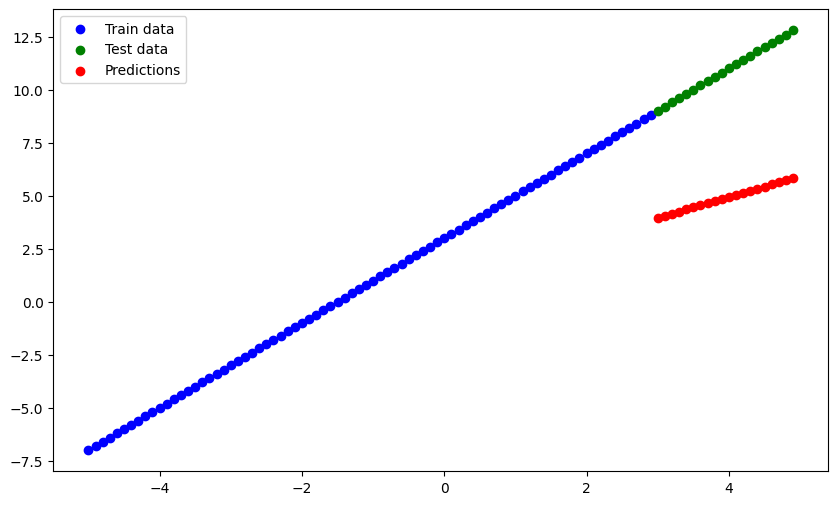

In [20]:
with torch.inference_mode():
    plot_prediction(pred=lrmodel(x_test))

In [21]:
#torch.save()
#torch.load()

#torch.nn.Module.load_state_dict() better for inferencing
##can also save optimizers state

In [22]:
from pathlib import Path

Model_path=Path('models')

Model_path.mkdir(parents=True,exist_ok=True)

In [23]:
model_name='test.pth'

torch.save(lrmodel.state_dict(),Model_path/model_name)

In [24]:
load_model=LinearRegressionModel()
load_model.load_state_dict(torch.load(Model_path/model_name))


<All keys matched successfully>

In [25]:
load_model.state_dict()

OrderedDict([('weights', tensor([0.9823])), ('bias', tensor([1.0150]))])

In [26]:
class LRModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer=nn.Linear(in_features=1,out_features=1) 
        #Also known as probing, linear transformer, fully connected and dense layer
        
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [27]:
torch.manual_seed(42)
model=LRModel()
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [28]:
#need to use next otherwise causes erro
next(model.parameters()).device

device(type='cpu')

In [29]:
model.to(device)
next(model.parameters()).device

device(type='cuda', index=0)

In [30]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.Adam(params=model.parameters(),lr=0.01)

In [31]:
x_train=x_train.to(device)
y_train=y_train.to(device)
x_test=x_test.to(device)
y_test=y_test.to(device)


In [32]:
EPOCHS=100


for epoch in range(EPOCHS):
    model.train()
    
    y_pred=model(x_train)
    
    loss=loss_fn(y_pred,y_train)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        test_pred=model(x_test)
        test_loss=loss_fn(test_pred,y_test)
        
    print(f"Epoch:{epoch} Train Loss:{loss} Test Loss:{test_loss}")
    
    
    

Epoch:0 Train Loss:2.5479836463928223 Test Loss:7.0005645751953125
Epoch:1 Train Loss:2.5286834239959717 Test Loss:6.9510650634765625
Epoch:2 Train Loss:2.5093834400177 Test Loss:6.901565074920654
Epoch:3 Train Loss:2.490083694458008 Test Loss:6.852065563201904
Epoch:4 Train Loss:2.4707834720611572 Test Loss:6.802565097808838
Epoch:5 Train Loss:2.451483726501465 Test Loss:6.753065586090088
Epoch:6 Train Loss:2.4321839809417725 Test Loss:6.7035651206970215
Epoch:7 Train Loss:2.412937879562378 Test Loss:6.65405797958374
Epoch:8 Train Loss:2.393848419189453 Test Loss:6.604545593261719
Epoch:9 Train Loss:2.3747670650482178 Test Loss:6.555027961730957
Epoch:10 Train Loss:2.35569167137146 Test Loss:6.505506992340088
Epoch:11 Train Loss:2.336620569229126 Test Loss:6.4559831619262695
Epoch:12 Train Loss:2.3175530433654785 Test Loss:6.406457424163818
Epoch:13 Train Loss:2.298488140106201 Test Loss:6.356929779052734
Epoch:14 Train Loss:2.2794251441955566 Test Loss:6.307400703430176
Epoch:15 Trai

In [33]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[1.6874]], device='cuda:0')),
             ('linear_layer.bias', tensor([2.0057], device='cuda:0'))])

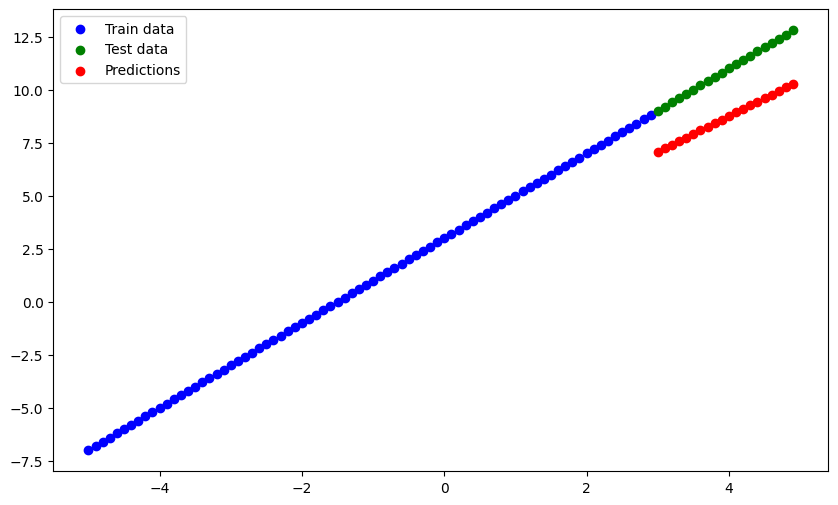

In [34]:
with torch.inference_mode():
    plot_prediction(pred=model(x_test).cpu())

In [35]:
model_name2='test2.pth'
torch.save(model,Model_path/model_name2)
torch.save(model.state_dict(),Model_path/model_name)

In [36]:
model2=LRModel()
model2.load_state_dict(torch.load(Model_path/model_name))

model2.to(device)

LRModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [38]:
model2.eval()
with torch.inference_mode():
    preds2=model2(x_test)
    
model(x_test)==preds2

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')